<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.12


In [3]:
# pip install tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [4]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [5]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


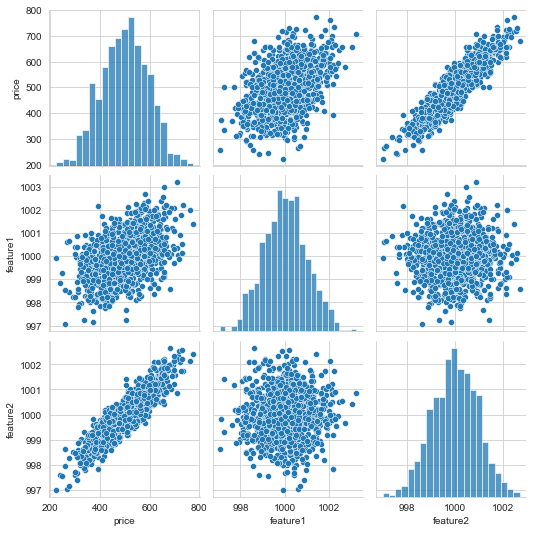

In [8]:
sns.pairplot(df);

In [9]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [10]:
from sklearn.model_selection import train_test_split

In [82]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values

In [14]:
X = df[['feature1', 'feature2']] 
y = df['price']

In [15]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [16]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
X_train.shape

(700, 2)

In [19]:
X_test.shape

(300, 2)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [24]:
import tensorflow as tf

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation

In [90]:
# help(Sequential)

In [91]:
# help(Dense)

In [92]:
X_train.shape

(700, 2)

In [93]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [112]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [113]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 4)                 12        
                                                                 
 dense_45 (Dense)            (None, 4)                 20        
                                                                 
 dense_46 (Dense)            (None, 4)                 20        
                                                                 
 dense_47 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.weights

[<tf.Variable 'dense_44/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.5071235 , -0.3118968 , -0.44115996, -0.6890063 ],
        [-0.5007775 ,  0.00517488, -0.24770927, -0.70833015]],
       dtype=float32)>,
 <tf.Variable 'dense_44/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_45/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.15120399, -0.5773503 ,  0.3313853 ,  0.75418836],
        [-0.5410792 ,  0.42599684, -0.59127843,  0.26356405],
        [-0.7453863 , -0.37301412,  0.731962  ,  0.3931479 ],
        [-0.32346368, -0.6814521 , -0.24216437, -0.22432625]],
       dtype=float32)>,
 <tf.Variable 'dense_45/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_46/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.04219657, -0.5871749 , -0.5827598 ,  0.1465537 ],
        [-0.24198079,  0.4619785 , -0.46386978, -0.59165645],
        [-0.8394521 , -0.81711334, -0

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [111]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [105]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 4s 21ms/step - loss: 256656.1562
Epoch 2/250
22/22 [==============================] - 0s 11ms/step - loss: 256588.2344
Epoch 3/250
22/22 [==============================] - 0s 12ms/step - loss: 256519.2188
Epoch 4/250
22/22 [==============================] - 0s 14ms/step - loss: 256444.3125
Epoch 5/250
22/22 [==============================] - 0s 9ms/step - loss: 256361.7812
Epoch 6/250
22/22 [==============================] - 0s 21ms/step - loss: 256269.4844
Epoch 7/250
22/22 [==============================] - 0s 22ms/step - loss: 256165.7188
Epoch 8/250
22/22 [==============================] - 0s 10ms/step - loss: 256047.9844
Epoch 9/250
22/22 [==============================] - 0s 14ms/step - loss: 255914.6719
Epoch 10/250
22/22 [==============================] - 0s 12ms/step - loss: 255764.3125
Epoch 11/250
22/22 [==============================] - 0s 13ms/step - loss: 255596.1562
Epoch 12/250
22/22 [==============================] -

In [106]:
model.weights

[<tf.Variable 'dense_36/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[1.1186711, 2.0824256, 2.461733 , 2.362168 ],
        [4.3737683, 3.1852758, 4.230423 , 4.369433 ]], dtype=float32)>,
 <tf.Variable 'dense_36/bias:0' shape=(4,) dtype=float32, numpy=array([0.9330022, 0.851095 , 0.9491424, 0.9496387], dtype=float32)>,
 <tf.Variable 'dense_37/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 3.6236944 , -0.0746673 ,  0.01705557, -0.83971244],
        [ 3.098173  ,  0.47278735, -0.84145486,  0.25533617],
        [ 3.1080043 , -0.54376584, -0.3696659 ,  0.55213064],
        [ 3.1695082 ,  0.24277826, -0.24283707, -0.6430251 ]],
       dtype=float32)>,
 <tf.Variable 'dense_37/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.9323439 , -0.29093254,  0.        , -0.08528582], dtype=float32)>,
 <tf.Variable 'dense_38/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.7380502 , -0.05399518, -0.36160856,  3.174567  ],
        [ 0.8098059 ,  0.01460643, -0.24182719, -0.1042420

In [107]:
model.history.history

{'loss': [256656.15625,
  256588.234375,
  256519.21875,
  256444.3125,
  256361.78125,
  256269.484375,
  256165.71875,
  256047.984375,
  255914.671875,
  255764.3125,
  255596.15625,
  255406.71875,
  255194.03125,
  254955.40625,
  254688.203125,
  254389.84375,
  254059.8125,
  253697.046875,
  253300.890625,
  252870.921875,
  252403.8125,
  251900.109375,
  251356.53125,
  250774.1875,
  250151.3125,
  249478.46875,
  248757.546875,
  247992.484375,
  247178.46875,
  246308.34375,
  245381.390625,
  244399.890625,
  243360.28125,
  242266.0625,
  241102.875,
  239880.921875,
  238587.640625,
  237226.28125,
  235789.28125,
  234284.609375,
  232705.984375,
  231052.3125,
  229322.265625,
  227511.40625,
  225614.515625,
  223639.765625,
  221578.28125,
  219430.375,
  217187.46875,
  214865.53125,
  212453.03125,
  209943.203125,
  207354.953125,
  204664.3125,
  201880.359375,
  198994.15625,
  196022.671875,
  192968.5,
  189796.9375,
  186536.421875,
  183174.875,
  179724.53

In [51]:
pd.DataFrame(model.history.history)

,loss
0,102129.508
1,98090.969
2,94059.539
3,90000.758
4,85947.711
...,...
245,24.204
246,23.925
247,24.347
248,24.299


<AxesSubplot:>

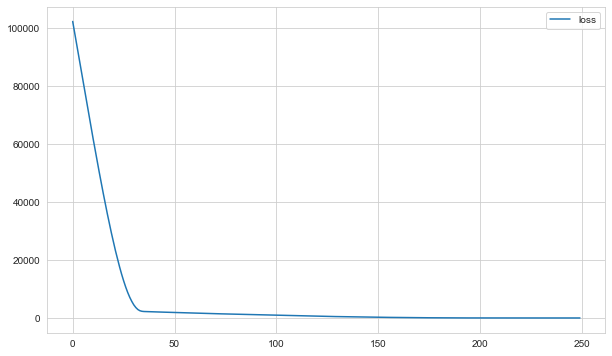

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

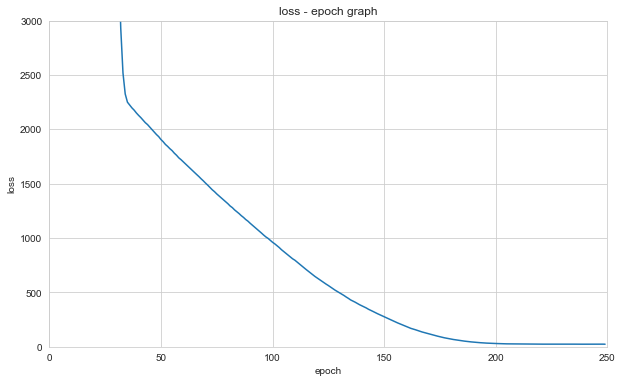

In [53]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [55]:
model.evaluate(X_train, y_train, verbose=0)

23.776561737060547

In [56]:
model.evaluate(X_test, y_test, verbose=0)

25.00493812561035

In [57]:
y_pred = model.predict(X_test)
y_pred.shape

(300, 1)

In [58]:
y_test.shape

(300,)

In [59]:
y_pred.reshape(-1,).shape

(300,)

In [60]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
893,560.678,549.984
266,439.090,432.941
259,484.020,489.952
867,502.902,511.214
110,390.209,392.679
33,448.430,460.295
668,343.735,344.654
5,542.984,543.177
631,548.614,543.365
155,410.538,411.033


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

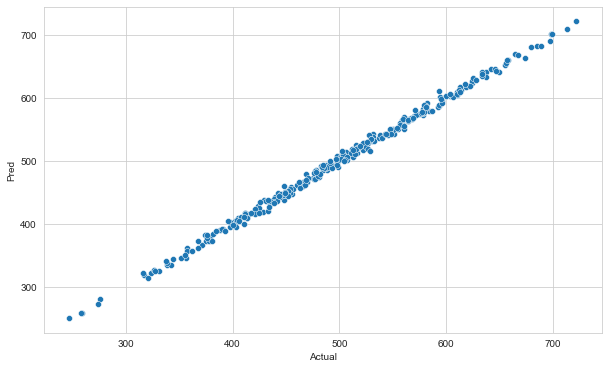

In [61]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [62]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [63]:
eval_metric(y_test, y_pred)

r2_score: 0.9971559538646715 
mae: 4.0073058233780054 
mse: 25.004943679702553 
rmse: 5.0004943435327025


## Final Model and Model Deployment

### Final Model Training

In [64]:
scaler = MinMaxScaler().fit(X)

In [65]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [66]:
X_scaled = scaler.transform(X)

In [115]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 5s 18ms/step - loss: 257429.9062
Epoch 2/250
32/32 [==============================] - 0s 13ms/step - loss: 257371.3906
Epoch 3/250
32/32 [==============================] - 0s 14ms/step - loss: 257306.8125
Epoch 4/250
32/32 [==============================] - 0s 15ms/step - loss: 257236.5625
Epoch 5/250
32/32 [==============================] - 0s 14ms/step - loss: 257158.4375
Epoch 6/250
32/32 [==============================] - 0s 12ms/step - loss: 257069.6875
Epoch 7/250
32/32 [==============================] - 1s 18ms/step - loss: 256964.8281
Epoch 8/250
32/32 [==============================] - 0s 14ms/step - loss: 256841.2500
Epoch 9/250
32/32 [==============================] - 1s 18ms/step - loss: 256696.3906
Epoch 10/250
32/32 [==============================] - 1s 21ms/step - loss: 256526.7188
Epoch 11/250
32/32 [==============================] - 0s 14ms/step - loss: 256327.6250
Epoch 12/250
32/32 [==============================] 

In [116]:
final_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 4)                 12        
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 4)                 20        
                                                                 
 dense_51 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [68]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [69]:
#final_model.save("model_fake_reg") 

### Loading Model

In [70]:
from tensorflow.keras.models import load_model

In [71]:
model_fake_reg = load_model('model_fake_reg.h5')

In [72]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [73]:
sample = [[998, 1000]]

In [74]:
sample_scaled = scaler_fake_reg.transform(sample)

In [75]:
model_fake_reg.predict(sample_scaled)

array([[420.4734]], dtype=float32)

## Prediction-2

In [76]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [77]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [78]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [79]:
model_fake_reg.predict(sample_scaled)

array([[380.26678],
       [331.80624],
       [283.34576],
       [234.88527],
       [186.35524]], dtype=float32)